# Audio AdaBoost

### Importing all libraries

In [ ]:
from google.colab import drive
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.multiclass import OneVsRestClassifier
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import pickle

### Connecting to Google Drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


### Loading datasets

In [ ]:
X_train = np.load('/content/drive/MyDrive/ml_dl/audio-2/training_set/X_train.npy')
y_train = np.load('/content/drive/MyDrive/ml_dl/audio-2/training_set/y_train.npy')

X_validation = np.load('/content/drive/MyDrive/ml_dl/audio-2/validation_set/X_validation.npy')
y_validation = np.load('/content/drive/MyDrive/ml_dl/audio-2/validation_set/y_validation.npy')

X_test = np.load('/content/drive/MyDrive/ml_dl/audio-2/test_set/X_test.npy')
y_test = np.load('/content/drive/MyDrive/ml_dl/audio-2/test_set/y_test.npy')

X = np.load('/content/drive/MyDrive/ml_dl/audio-2/dataset/X.npy')
y = np.load('/content/drive/MyDrive/ml_dl/audio-2/dataset/y.npy')

### Random Forest Classifier training and performance

In [ ]:
random_forest_clf = RandomForestClassifier()
random_forest_clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = random_forest_clf.predict(X_validation)
print("Accuracy:", metrics.accuracy_score(y_validation, y_pred))

Accuracy: 0.9097222222222222


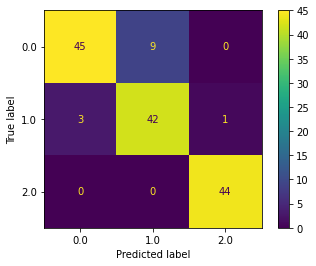

In [ ]:
cm = confusion_matrix(y_validation, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = random_forest_clf.classes_)
disp.plot()
plt.show()

### AdaBoost Classifier training

In [ ]:
adaboost_classifier = AdaBoostClassifier(base_estimator = random_forest_clf)
adaboost_classifier.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=RandomForestClassifier())

In [ ]:
y_pred = adaboost_classifier.predict(X_validation)
print("Accuracy:", metrics.accuracy_score(y_validation, y_pred))

Accuracy: 0.8958333333333334


### ***learning_rate*** hyperparameter tuning

In [ ]:
rate = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
acc = []

for i in rate:
  adaboost_classifier = AdaBoostClassifier(base_estimator = random_forest_clf, learning_rate = i)
  adaboost_classifier.fit(X_train, y_train)
  y_pred = adaboost_classifier.predict(X_validation)
  a = metrics.accuracy_score(y_validation, y_pred)
  acc.append(a)

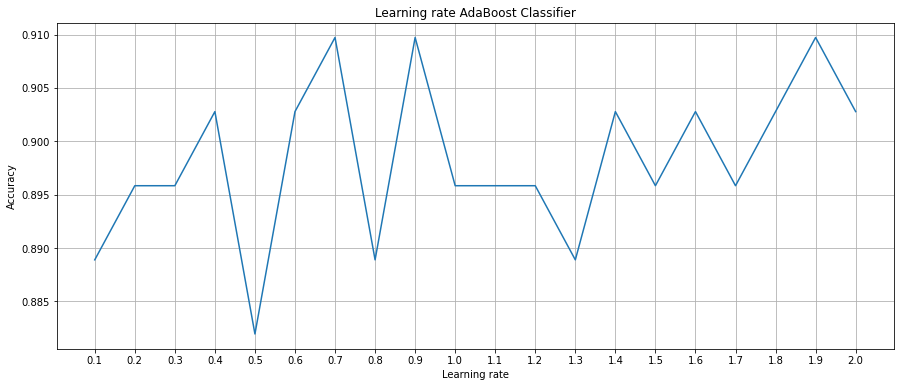

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(rate, acc)
plt.title("Learning rate AdaBoost Classifier")
plt.xlabel("Learning rate")
plt.ylabel("Accuracy")
plt.grid(True)
plt.xticks(rate)
plt.show()

### One-VS-Rest Classifier training and performance

In [ ]:
ovr = OneVsRestClassifier(AdaBoostClassifier(base_estimator = random_forest_clf, learning_rate=1.9), n_jobs=-1)
ovr.fit(X_train, y_train)

OneVsRestClassifier(estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier(),
                                                 learning_rate=1.9),
                    n_jobs=-1)

In [ ]:
y_pred = ovr.predict(X_validation)
print("Accuracy:", metrics.accuracy_score(y_validation, y_pred))

Accuracy: 0.9097222222222222


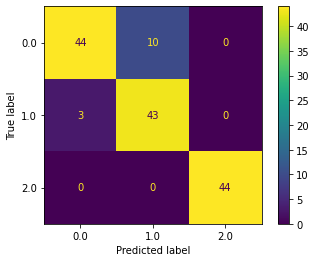

In [ ]:
cm = confusion_matrix(y_validation, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ovr.classes_)
disp.plot()
plt.show()

### 10-fold Cross Validation

In [ ]:
scores = cross_val_score(ovr, X = X, y = y, cv=10, n_jobs=-1)
accuracy_CV10 = np.mean(scores)
print('Cross Validation accuracy: ' + str(accuracy_CV10))

Cross Validation accuracy: 0.9187978142076503


### Saving the best model

In [ ]:
model_path = "/content/drive/MyDrive/ml_dl/audio-2/models/audio_adaboost.pkl"

# save
with open(model_path,'wb') as f:
    pickle.dump(ovr,f)

# load
with open(model_path, 'rb') as f:
    ovr = pickle.load(f)